In [54]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  #Adjusts the configuration of plots

# Read in the data
df = pd.read_csv(r'movies.csv')

In [55]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [56]:
# Are there empty fields

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [57]:
# Data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [58]:
# Convert to integer 

df['budget'] = df['budget'].fillna(0).astype('int64')

df['gross'] = df['gross'].fillna(0).astype('int64')

In [59]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [60]:
df[['released_date', 'released_country']] = df['released'].apply(lambda x: pd.Series(str(x).split("(")))

df['correct_year'] = df['released_date'].astype(str).str[-5:]

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_country,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States),1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States),1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States),1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States),1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States),1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,"October 23, 2020",United States),2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,"February 7, 2020",United States),2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,"April 27, 2020",Cameroon),2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,"October 1, 2020",United States),2020


In [61]:
# Order by gross revenue

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_country,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009",United States),2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019",United States),2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997",United States),1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015",United States),2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018",United States),2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,"January 26, 1990",United States),1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,"April 14, 1989",United States),1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,"April 7, 1989",United States),1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,"January 13, 1990",Japan),1990


In [62]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

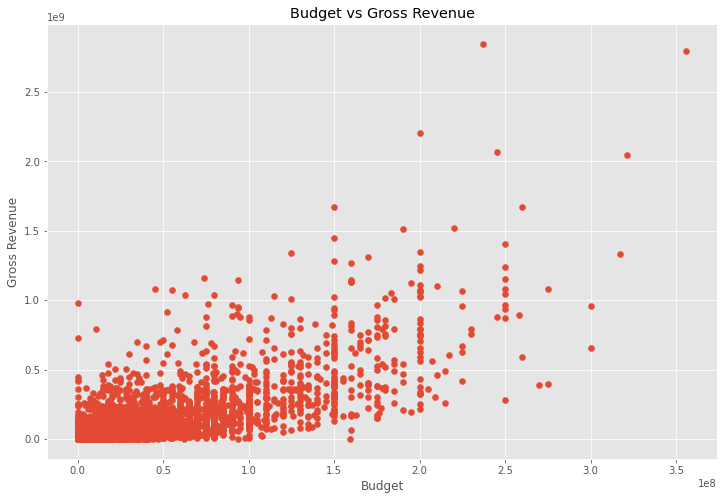

In [63]:
# Scatter plot with budget vs gross revenue

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

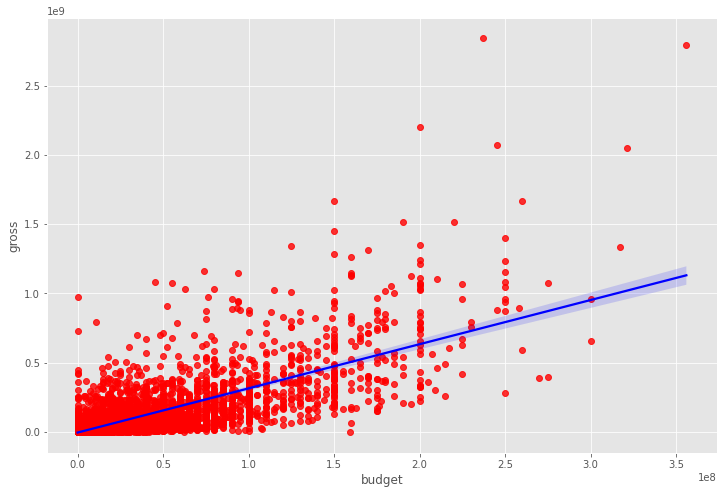

In [64]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [65]:
df.corr(method='pearson') #default
# df.corr(method='kendall')
# df.corr(method='spearman')

# High correlation between budget and gross revenue

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


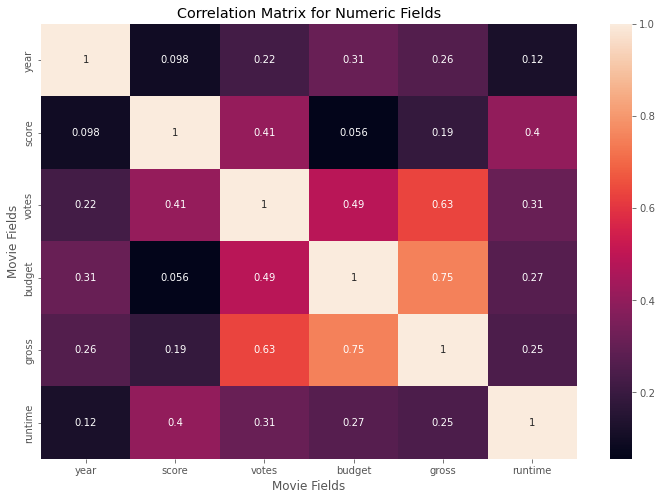

In [66]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Fields')
plt.xlabel('Movie Fields')
plt.ylabel('Movie Fields')
plt.show()

In [67]:
#Company vs Gross Revenue

df_categorized = df

for col_name in df_categorized.columns:
    if(df_categorized[col_name].dtype == 'object'):
        df_categorized[col_name] = df_categorized[col_name].astype('category')
        df_categorized[col_name] = df_categorized[col_name].cat.codes.replace(-1, np.nan)

df_categorized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_country,correct_year
0,6587,6.0,6,1980,1705.0,8.4,927000.0,2589,4014.0,1047.0,54.0,19000000,46998772,2319.0,146.0,1510,56.0,0
1,5573,6.0,1,1980,1492.0,5.8,65000.0,2269,1632.0,327.0,55.0,4500000,58853106,731.0,104.0,1311,56.0,0
2,5142,4.0,0,1980,1771.0,8.7,1200000.0,1111,2567.0,1745.0,55.0,18000000,538375067,1540.0,124.0,1568,56.0,0
3,286,4.0,4,1980,1492.0,7.7,221000.0,1301,2000.0,2246.0,55.0,3500000,83453539,1812.0,88.0,1311,56.0,0
4,1027,6.0,4,1980,1543.0,7.3,108000.0,1054,521.0,410.0,55.0,6000000,39846344,1777.0,98.0,1360,56.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,NaN,6,2020,2964.0,3.1,18.0,1500,2289.0,2421.0,55.0,7000,0,NaN,90.0,2582,56.0,40
7664,1678,NaN,4,2020,1107.0,4.7,36.0,774,2614.0,1886.0,55.0,0,0,539.0,90.0,975,56.0,40
7665,4717,NaN,6,2020,193.0,5.7,29.0,2061,2683.0,2040.0,55.0,58750,0,941.0,NaN,162,8.0,40
7666,2843,NaN,6,2020,2817.0,NaN,NaN,1184,1824.0,450.0,55.0,15000,0,NaN,120.0,2462,56.0,40


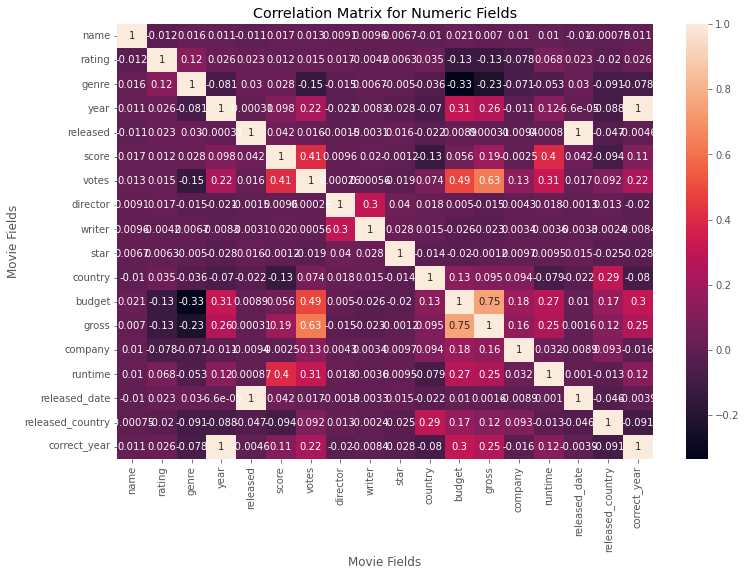

In [68]:
correlation_matrix = df_categorized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Fields')
plt.xlabel('Movie Fields')
plt.ylabel('Movie Fields')
plt.show()

In [70]:
correlation_mat = df_categorized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name          name                1.000000
              rating             -0.012148
              genre               0.016355
              year                0.011453
              released           -0.010903
                                    ...   
correct_year  company            -0.016356
              runtime             0.120636
              released_date      -0.003913
              released_country   -0.091295
              correct_year        1.000000
Length: 324, dtype: float64

In [71]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre         budget         -0.334021
budget        genre          -0.334021
genre         gross          -0.234297
gross         genre          -0.234297
votes         genre          -0.145307
                                ...   
gross         gross           1.000000
company       company         1.000000
runtime       runtime         1.000000
writer        writer          1.000000
correct_year  correct_year    1.000000
Length: 324, dtype: float64

In [72]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes             gross               0.632834
gross             votes               0.632834
budget            gross               0.750157
gross             budget              0.750157
correct_year      year                0.997295
year              correct_year        0.997295
released          released_date       0.999912
released_date     released            0.999912
name              name                1.000000
released_date     released_date       1.000000
rating            rating              1.000000
genre             genre               1.000000
year              year                1.000000
released          released            1.000000
score             score               1.000000
votes             votes               1.000000
released_country  released_country    1.000000
director          director            1.000000
star              star                1.000000
country           country             1.000000
budget            budget              1.000000
gross        

In [ ]:
#Company does not high a correlation to the gross revenue

#Votes has a high correlation to the gross revenue